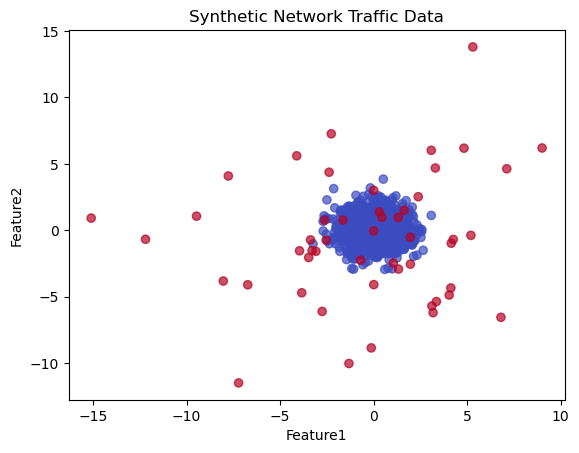

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic normal network traffic data
normal_traffic = np.random.normal(loc=0, scale=1, size=(1000, 2))

# Generate synthetic anomalous network traffic data
anomalous_traffic = np.random.normal(loc=0, scale=5, size=(50, 2))

# Combine into a single dataset
data = np.vstack((normal_traffic, anomalous_traffic))
labels = np.hstack((np.zeros(1000), np.ones(50)))  # 0 for normal, 1 for anomaly

# Create a DataFrame for easier handling
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Label'] = labels

# Visualize the synthetic data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Label'], cmap='coolwarm', alpha=0.7)
plt.title("Synthetic Network Traffic Data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


In [19]:
# Standardize the features
scaler = StandardScaler()
df[['Feature1', 'Feature2']] = scaler.fit_transform(df[['Feature1', 'Feature2']])

# Split the features and labels
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values


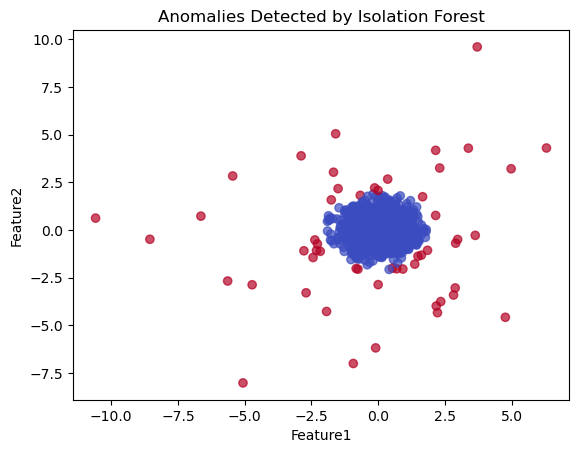

In [20]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
iso_forest.fit(X)

# Predict anomalies
df['Anomaly_IF'] = iso_forest.predict(X)
df['Anomaly_IF'] = df['Anomaly_IF'].map({1: 0, -1: 1})  # Convert to 0 for normal, 1 for anomaly

# Visualize the results
plt.scatter(df['Feature1'], df['Feature2'], c=df['Anomaly_IF'], cmap='coolwarm', alpha=0.7)
plt.title("Anomalies Detected by Isolation Forest")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8450 - val_loss: 3.7106
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7760 - val_loss: 3.6844
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8003 - val_loss: 3.6581
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8016 - val_loss: 3.6315
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7597 - val_loss: 3.6063
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8050 - val_loss: 3.5804
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7491 - val_loss: 3.5558
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7451 - val_loss: 3.5315
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6695 - val_loss: 3.5078
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6904 - val_loss: 3.4839
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6992 - val_loss: 3.4612
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6898 - val_lo

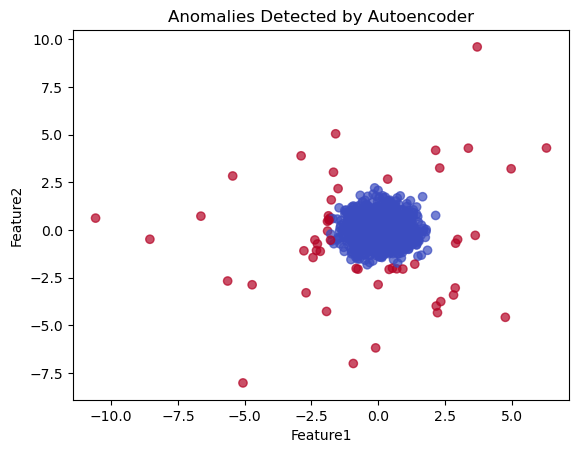

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the autoencoder model
input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

# Get the reconstruction error
reconstructions = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)
df['Anomaly_AE'] = (mse > threshold).astype(int)

# Visualize the results
plt.scatter(df['Feature1'], df['Feature2'], c=df['Anomaly_AE'], cmap='coolwarm', alpha=0.7)
plt.title("Anomalies Detected by Autoencoder")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


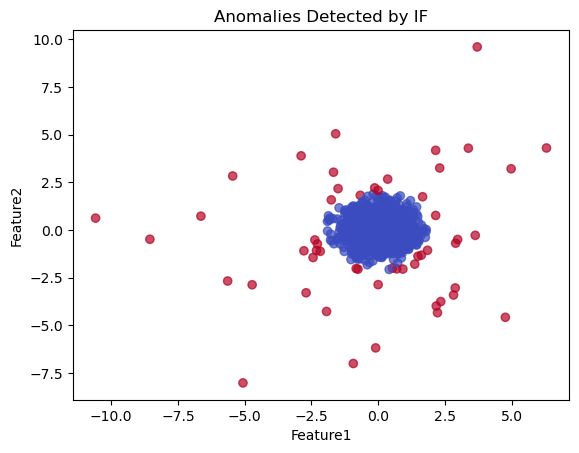

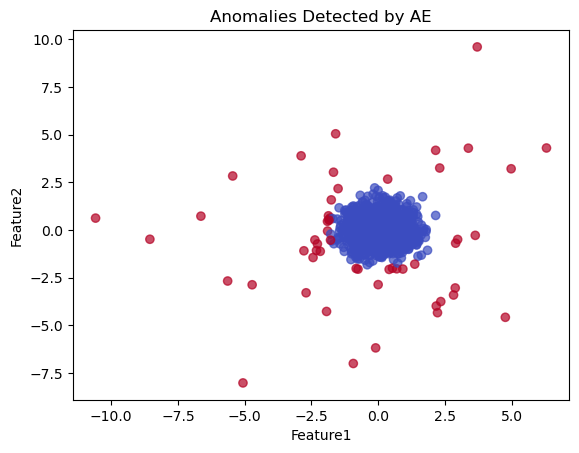

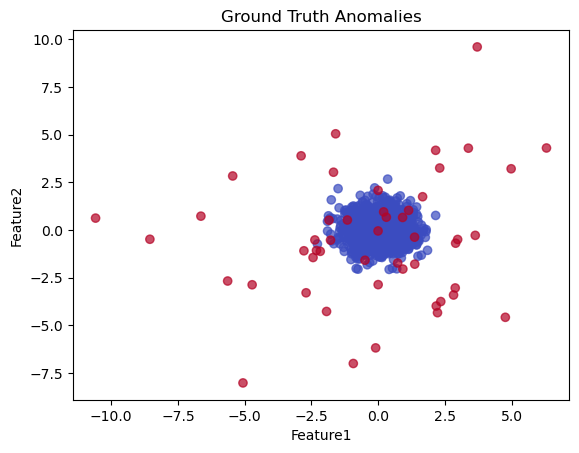

In [23]:
# Visualization function for side-by-side comparison
def plot_anomalies(df, method):
    plt.scatter(df['Feature1'], df['Feature2'], c=df[f'Anomaly_{method}'], cmap='coolwarm', alpha=0.7)
    plt.title(f"Anomalies Detected by {method}")
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()

# Plot anomalies detected by Isolation Forest
plot_anomalies(df, 'IF')

# Plot anomalies detected by Autoencoder
plot_anomalies(df, 'AE')

# Compare with the ground truth
plt.scatter(df['Feature1'], df['Feature2'], c=df['Label'], cmap='coolwarm', alpha=0.7)
plt.title("Ground Truth Anomalies")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()
